# CRISP DM

## Bussines Understanding

Saya menggunakan dataset Catatan Pasien Hati India dari Kaggle (https://www.kaggle.com/datasets/uciml/indian-liver-patient-records) ini untuk mengevaluasi algoritma prediksi apakah pasien memiliki penyakit hati atau tidak berdasarkan fitur tertentu. Saya akan memeriksa dengan total protein, albumin, dll. apakah itu terkait dengan penyakit atau tidak. Pasien dari india dengan penyakit hati ini terus meningkat karena konsumsi alkohol yang berlebihan, menghirup gas berbahaya, asupan makanan yang terkontaminasi, acar dan obat-obatan.

Maka dari itu, disediakan nya kumpulan data ini bertujuan untuk mengetahui dan menentukan tingkat risiko individu atau pasien di India, agar dapat mengurangi kesalahan diagnosis pada pasien dan dokter dapat melakukan tindakan pengobatan dengan akurat. Tak hanya itu, di gunakannya data ini yaitu bagaimana memprediksi hidup atau meninggalnya pasien penyakit liver ini dengan tingkat akurasi dan mencari atribut paling berpengaruh terhadap prediksi hidup atau meninggalnya pasien penyakit liver. 

## Data Understanding

Dari pengumpulan data yang telah diambil mengenai penyakit liver, berisi 416 catatan pasien memiliki penyakit liver hati dan 167 catatan pasien tidak memiliki penyakit liver yang dikumpulkan dari Timur Laut Andhra Pradesh, India. Kolom "Dataset" adalah label kelas yang digunakan untuk membagi kelompok menjadi pasien hati (penyakit hati) atau tidak (tidak ada penyakit). Kumpulan data ini berisi 441 catatan pasien pria dan 142 catatan pasien wanita.

Setiap pasien yang usianya melebihi 89 terdaftar sebagai usia "90". Berikut atribut-atribut nya :

0. Age : umur pasien penyakit liver dari India.
1. Gender : Memberitahu jenis kelamin pasien tersebut. (0 = Perempuan, 1 = Laki-Laki)
2. Total_Bilirubins : Tes bilirubin mengukur jumlah bilirubin dalam darah pasien. Ini digunakan untuk membantu menemukan penyebab kondisi kesehatan seperti penyakit kuning, anemia, dan penyakit hati (mg/dL).
3. Direct_Bilirubin : Bilirubin yang melekat oleh hati pada asam glukuronat, asam yang diturunkan dari glukosa (mg/dL).
4. Alkaline_Phosphotase : enzim dalam darah seseorang yang membantu memecah protein. Tubuh menggunakan ALP untuk berbagai proses, dan memainkan peran yang sangat penting dalam fungsi hati dan perkembangan tulang.
5. Alamine_Aminotransferase : enzim yang ditemukan terutama di hati dan ginjal yang digunakan untuk menyaring dan / atau memantau penyakit hati
6. Aspartate_Aminotransferase : enzim yang sebagian besar ditemukan di hati, tetapi juga di otot. Ketika hati Anda rusak, ia melepaskan AST ke dalam aliran darah pasien. Tes darah AST mengukur jumlah AST dalam darah pasien.
7. Total_protein : Ini digunakan sebagai bagian dari pemeriksaan kesehatan rutin pasien dan juga dapat digunakan jika pasien memiliki penurunan berat badan yang tidak terduga, kelelahan, atau gejala penyakit ginjal atau hati.
8. Albumin  : protein yang dibuat oleh hati pasien. Albumin membantu menjaga cairan dalam aliran darah pasien sehingga tidak bocor ke jaringan lain. Tingkat albumin yang rendah dapat mengindikasikan masalah dengan hati atau ginjal Pasien.
9. Albumin_and_Globulin_Ratio : rasio albumin yang ada dalam serum sehubungan dengan jumlah globulin. Rasio hanya dapat ditafsirkan berdasarkan konsentrasi protein total. Secara umum, rasio normal pada sebagian besar spesies mendekati 1:1.
10. Dataset : label kelas yang digunakan untuk membagi kelompok menjadi : 

        - 1 : pasien memiliki penyakit hati.
        - 2 : pasien tidak memiliki penyakit hati.

# Import library

In [317]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Load Dataset

In [318]:
liver = pd.read_csv("indian_liver_patient.csv")

In [319]:
liver.head(9)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2


In [320]:
liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         219 non-null    int64  
 1   Gender                      219 non-null    object 
 2   Total_Bilirubin             219 non-null    float64
 3   Direct_Bilirubin            219 non-null    float64
 4   Alkaline_Phosphotase        219 non-null    int64  
 5   Alamine_Aminotransferase    219 non-null    int64  
 6   Aspartate_Aminotransferase  219 non-null    int64  
 7   Total_Protiens              219 non-null    float64
 8   Albumin                     219 non-null    float64
 9   Albumin_and_Globulin_Ratio  219 non-null    float64
 10  Dataset                     219 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 18.9+ KB


# DATA PREPARATION

# Converting categorical column to binary numerical

In [322]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
liver['Gender']=enc.fit_transform(liver['Gender'])
liver.head(7)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [342]:
liver.to_csv('Liver.csv')

# pisahkan data atribut dengan label

In [323]:
X = liver.drop(columns=['Dataset'], axis=1)
Y = liver['Dataset']

In [324]:
print(X)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65       0              0.7               0.1                   187   
1     62       1             10.9               5.5                   699   
2     62       1              7.3               4.1                   490   
3     58       1              1.0               0.4                   182   
4     72       1              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
214   38       1              1.7               1.0                   180   
215   66       1              0.6               0.2                   100   
216   55       1              0.9               0.2                   116   
217   49       1              1.1               0.5                   159   
218    6       1              0.6               0.1                   289   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

In [325]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
214    1
215    2
216    2
217    1
218    2
Name: Dataset, Length: 219, dtype: int64


# Visualisasi Data

## Age distribution of the patients

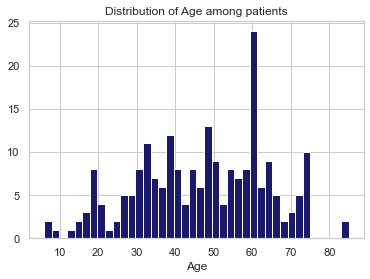

In [326]:
liver['Age'].hist(bins=40, color='midnightblue')
plt.title("Distribution of Age among patients")
plt.xlabel("Age");

## Distribution of Gender in patients in the dataset

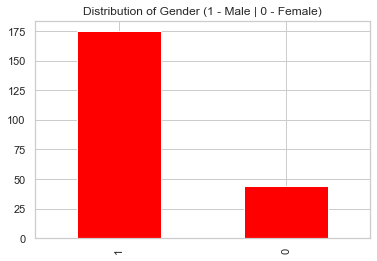

In [327]:
liver['Gender'].value_counts().plot.bar(color='red')
plt.title("Distribution of Gender (1 - Male | 0 - Female)");

## Diagnosis of the patients

Kolom bernama Dataset memiliki dua nilai, 1 melambangkan bahwa pasien memiliki penyakit hati dan 2 melambangkan bahwa pasien tidak memiliki penyakit.

In [328]:
# changing the column name
liver.rename(columns={'Dataset': 'Diagnosis', 'Total_Protiens': 'Total_Proteins'}, inplace=True)

# changing labels
liver['Diagnosis'] = liver['Diagnosis'].apply(lambda x:1 if x==1 else 2)

Text(0.5, 1.0, 'Diagnosis of patients (1 - Liver disease | 2 - No Liver disease')

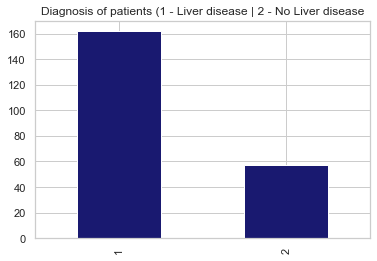

In [329]:
liver['Diagnosis'].value_counts().plot.bar(color='midnightblue')
plt.title('Diagnosis of patients (1 - Liver disease | 2 - No Liver disease')

# Split data

In [330]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=21)

In [331]:
print(X.shape, X_train.shape, x_test.shape)

(219, 10) (153, 10) (38, 10)


# MODELLING DATA

# Membuat model training

In [332]:
model = LogisticRegression()

In [333]:
model.fit(X_train, y_train)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

# EVALUATION

# Evaluasi model

In [334]:
x_train_predict = model.predict(X_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [335]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.7450980392156863


In [336]:
y_test_predict = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test_predict, y_test)

In [337]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.7424242424242424


# Model Prediksi

In [343]:
input_data = (62, 0, 10.9, 5.5, 699, 64, 100, 7.5, 3.2, 0.74)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
predict = model.predict(data_reshaped)
print(predict)

if (predict[0] == 0):
    print('Pasien tidak memiliki Penyakit Liver')
else:
    print('Pasien memiliki Penyakit Liver')

[1]
Pasien memiliki Penyakit Liver


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


# DEPLOYMENT

# Save Model

In [339]:
import pickle

filename = 'Liver_Patient.sav'
pickle.dump(model, open(filename, 'wb'))